In [1]:
from resnet import Resnet
from dataset import *
from torch.utils.data import DataLoader
import torch
from PIL import Image

In [2]:
model = Resnet(19)

In [167]:
import os
import re

import cv2
import numpy as np
from torch.utils.data import Dataset
from tqdm import tqdm
import torchvision.transforms.functional as TF
import random


class RotationTransform:
    """Rotate by one of the given angles."""

    def __init__(self, angle):
        self.angle = angle

    def __call__(self, x):
        return TF.rotate(x, self.angle)
    

class ImageDataset(Dataset):
    MEAN = [0.485, 0.456, 0.406]
    STD = [0.229, 0.224, 0.225]

    def __init__(self, path: str, width: int, height: int, use_data_augmentation: bool = False):
        self.width = width
        self.height = height
        self.path = path
        self.dataset_meta = self.define_dataset_meta()
        self.image_paths = self.parse_file(path) or None
        self.image_keys = list(self.image_paths.keys())
        self.image_classes = list(self.image_paths.values())
        self.process_image_pipeline = transforms.Compose([
                    transforms.ToTensor(),
                    transforms.CenterCrop((224, 224)),
                    RotationTransform(90),
                    transforms.Normalize(MEAN, STD),
        ])

    def parse_file(self, path: str):
        if not os.path.exists(path):
            raise ValueError("Provided path doesn't exist")

        with open(os.path.join(path, self.dataset_meta), "r") as f:
            lines = f.readlines()

        paths = {}
        for line in lines:
            s = re.split(r'\t+', line.rstrip().rstrip('\t'))
            paths[s[0]] = s[1]

        return paths

    def calculate_stats(self):
        """
        Calculate the mean and standard deviation per channel over the entire dataset.
        THIS METHOD DOESN'T SAVE THE STATS
        BE CAREFULLY, THIS IS DANGEROUS CODE
        """
 
        train_stacked = []
        for k in tqdm(range(len(self.image_keys)), "Reading images"):
            arr = self[k]
            train_stacked.append(arr)

        train_stacked = np.stack(train_stacked)
        means = [np.mean(train_stacked[:, :, :, i]) for i in range(2)]
        stds = [np.std(train_stacked[:, :, :, i]) for i in range(2)]

        print("Mean per channel: ", means)
        print("Standard deviation per channel: ", stds)

    def __len__(self):
        if self.image_paths:
            return len(self.image_paths.keys())
        raise Exception("There is no data!")

    def smart_resize(self, arr):
        ratio = self.width / min(arr.shape[:2])
        new_width = round(arr.shape[0] * ratio)
        new_height = round(arr.shape[1] * ratio)
        arr_resized = cv2.resize(arr, dsize=(int(new_height), int(new_width)))
        if arr_resized.shape[1] > arr_resized.shape[0]:
            diff = arr_resized.shape[1] - self.width
            half = int(diff / 2)
            arr_cropped = arr_resized[:, half: half + self.width]
        else:
            diff = arr_resized.shape[0] - self.width
            half = int(diff / 2)
            arr_cropped = arr_resized[half: half + self.width, :]
        return arr_cropped

    def __getitem__(self, index: int):

        assert index < len(self), f"Index must be less or equal to {len(self) - 1}"

        arr = Image.open(os.path.join(self.path, self.image_keys[index]))
        arr = self.process_image_pipeline(arr)
        if self.use_data_augmentation:
            if random.random()
        

        return arr, int(self.image_classes[index])

    def define_dataset_meta(self):
        raise NotImplementedError


class TrainImageDataset(ImageDataset):

    def __init__(self, path: str, width: int, height: int):
        super(TrainImageDataset, self).__init__(path, width, height)

    def define_dataset_meta(self):
        return "train_sample.txt"


class TestImageDataset(ImageDataset):

    def __init__(self, path: str, width: int, height: int):
        super(TestImageDataset, self).__init__(path, width, height)

    def define_dataset_meta(self):
        return "test_sample.txt"


class ImageOfflineDataset(ImageDataset):

    def __init__(self, path: str, width: int, height: int):
        super(ImageOfflineDataset, self).__init__(path, width, height)
        self.processed_images, self.labels = self.load()

    def load(self):
        processed_images, processed_labels = [], []
        for i in tqdm(range(len(self)), "Loading images into memory "):
            arr, label = super().__getitem__(i)
            processed_images.append(arr)
            processed_labels.append(label)
        return processed_images, processed_labels

    def __getitem__(self, item: int):
        return self.processed_images[item], self.labels[item]

    def define_dataset_meta(self):
        return "train_sample.txt"


SyntaxError: invalid syntax (<ipython-input-167-56664787c736>, line 101)

In [163]:
train_dataset = TrainImageDataset(r"C:\Users\C0101\PycharmProjects\cc7221\data\clothing-small", 224, 224)

In [164]:
e = train_dataset[0]
print(e[0].shape)

torch.Size([3, 224, 224])


In [52]:
import matplotlib.pyplot as plt
arr = cv2.imread("/home/rudy/Documents/cc7221/tarea1/data/clothing-small/test_sample/1fb06ea6-a5dc-4ee2-a.png", cv2.IMREAD_COLOR)
arr = cv2.cvtColor(arr, cv2.COLOR_BGR2RGB)

(304, 226, 3)


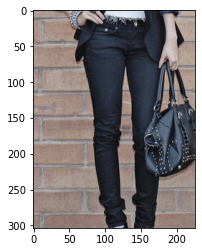

In [54]:
plt.imshow(arr)
print(arr.shape)

0.9911504424778761
(304, 226, 3)
(362, 224, 3)
(224, 224, 3)


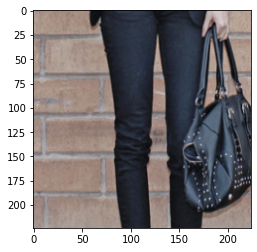

In [55]:
plt.imshow(smart_resize(arr))

In [120]:
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
import torchvision.transforms.functional as TF

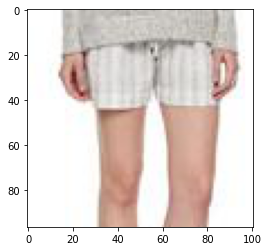

In [128]:
# arr = cv2.imread(r"C:\Users\C0101\PycharmProjects\cc7221\data\clothing-small\train_sample\0a9cc985-06a3-41fe-8.png", cv2.IMREAD_COLOR)
from PIL import Image
arr = Image.open(r"C:\Users\C0101\PycharmProjects\cc7221\data\clothing-small\train_sample\0a9cc985-06a3-41fe-8.png")
plt.imshow(arr)
plt.show()

In [155]:
MEAN = [0.485, 0.456, 0.406]
STD = [0.229, 0.224, 0.225]

import torchvision.transforms.functional as TF
import random

class RotationTransform:
    """Rotate by one of the given angles."""

    def __init__(self, angle):
        self.angle = angle

    def __call__(self, x):
        return TF.rotate(x, self.angle)
    
    
t = transforms.Compose([
            transforms.ToTensor(),
            transforms.CenterCrop((224, 224)),
            RotationTransform(90),
            transforms.Normalize(MEAN, STD),
])

In [151]:
print(arr.size)
y = t(arr)
print(y.shape)

(101, 97)
torch.Size([3, 224, 224])


In [152]:
y_ = y.numpy()
y_ = np.swapaxes(y_, 0, -1)
print(y_.shape)

(224, 224, 3)
